In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
left_x = -100
right_x = 100

m_1 = 1
m_2 = 0.5
stiffness = 1
omega = 1
a = 1

particles_num = np.round(np.arange(left_x, right_x, a)/a)
particles_mass = np.array([m_1 if i < 0 else m_2 for i in particles_num])

In [3]:
def specify_initial_and_boundary(particles_num, beta, n_0, u_0, stiffness, m_1, a, omega):

    k_1 = np.arcsin(omega/2 * np.sqrt(m_1/stiffness)) * 2 / a
    g_1 = a * np.sqrt(stiffness/m_1) * np.cos(k_1*a/2)
    
    particles_disp = np.array([0]*len(particles_num), dtype=float)
    particles_vel = np.array([0]*len(particles_num), dtype=float)

    for i, num in enumerate(particles_num):
        if num < 0:
            particles_disp[i] = u_0 * np.exp(-beta**2/2 * (num - n_0)**2) * np.sin(num * a * k_1)
            particles_vel[i] = -u_0 * np.exp(-beta**2/2 * (num - n_0)**2)
            particles_vel[i] *= (omega * np.cos(k_1*a*num) - beta**2*g_1/a*(num-n_0)*np.sin(num * a * k_1))
        
    return particles_disp, particles_vel

In [4]:
def solver(particles_mass, particles_disp, particles_vel, particles_history, t_max, dt):

    times = np.arange(0, t_max, dt)

    for t in tqdm(times):
        deform = np.roll(particles_disp,-1)+np.roll(particles_disp,1)-2*particles_disp
        particles_vel += (stiffness/particles_mass)*deform*dt
        particles_disp += particles_vel * dt
        if t % 2 == 0:
            particles_history = np.vstack((particles_history, particles_disp))
    
    return particles_disp, particles_history

0.8617060840633998


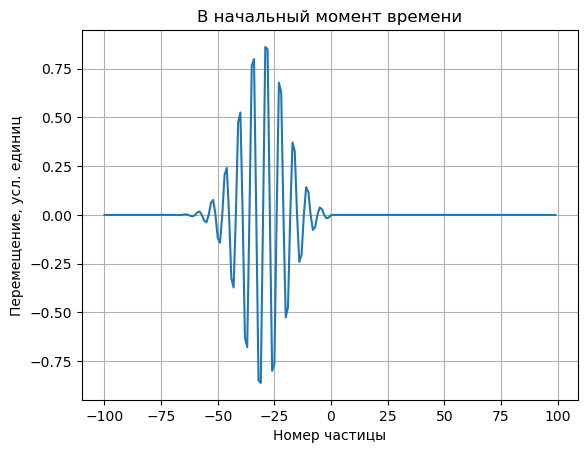

In [5]:
beta = 0.1
n_0 = -30
u_0 = 1

particles_disp, particles_vel = specify_initial_and_boundary(particles_num, beta, n_0, u_0, stiffness, m_1, a, omega)

plt.plot(particles_num, particles_disp)
plt.title(f'В начальный момент времени')
plt.xlabel('Номер частицы')
plt.ylabel('Перемещение, усл. единиц')
plt.grid()
print(max(particles_disp))

100%|██████████| 17000/17000 [00:00<00:00, 27945.76it/s]


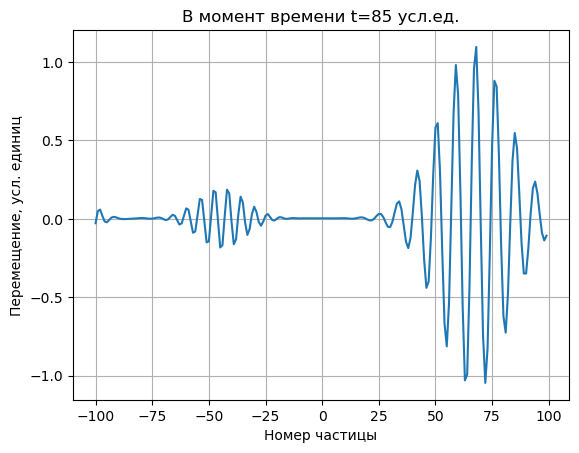

In [6]:
dt = 0.005
t_max = 85

particles_history = np.zeros(shape=(1,len(particles_num)))
particles_disp, particles_history = solver(particles_mass, particles_disp, particles_vel,
                                           particles_history, t_max, dt)

plt.plot(particles_num, particles_disp)
plt.title(f'В момент времени t={t_max} усл.ед.')
plt.xlabel('Номер частицы')
plt.ylabel('Перемещение, усл. единиц')
plt.grid()

In [7]:
#plt.plot(particles_history[:,20])

In [8]:
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()

fig, ax = plt.subplots()

line = ax.plot(particles_num, particles_history[1], c='blue', linewidth=1)[0]
plt.grid()
plt.ylim((-1.2,1.2))
plt.plot([0,0],[-1.2,1.2], c='r', linewidth=0.8)
plt.xlabel('Номер частицы')
plt.ylabel('Перемещение, усл.ед.')

def update(frame):
    line.set_xdata(particles_num)
    line.set_ydata(particles_history[frame])
    plt.title(f't={2*frame}')
    return line, 

animation.FuncAnimation(fig, update, frames=len(particles_history))